In [121]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report



# Data analysis, Selection and Cleaning

In [122]:
data = pd.read_csv("Cancer_Data.csv")

In [123]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [124]:
data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [125]:
data = data.drop(["id","Unnamed: 32"], axis = 1)

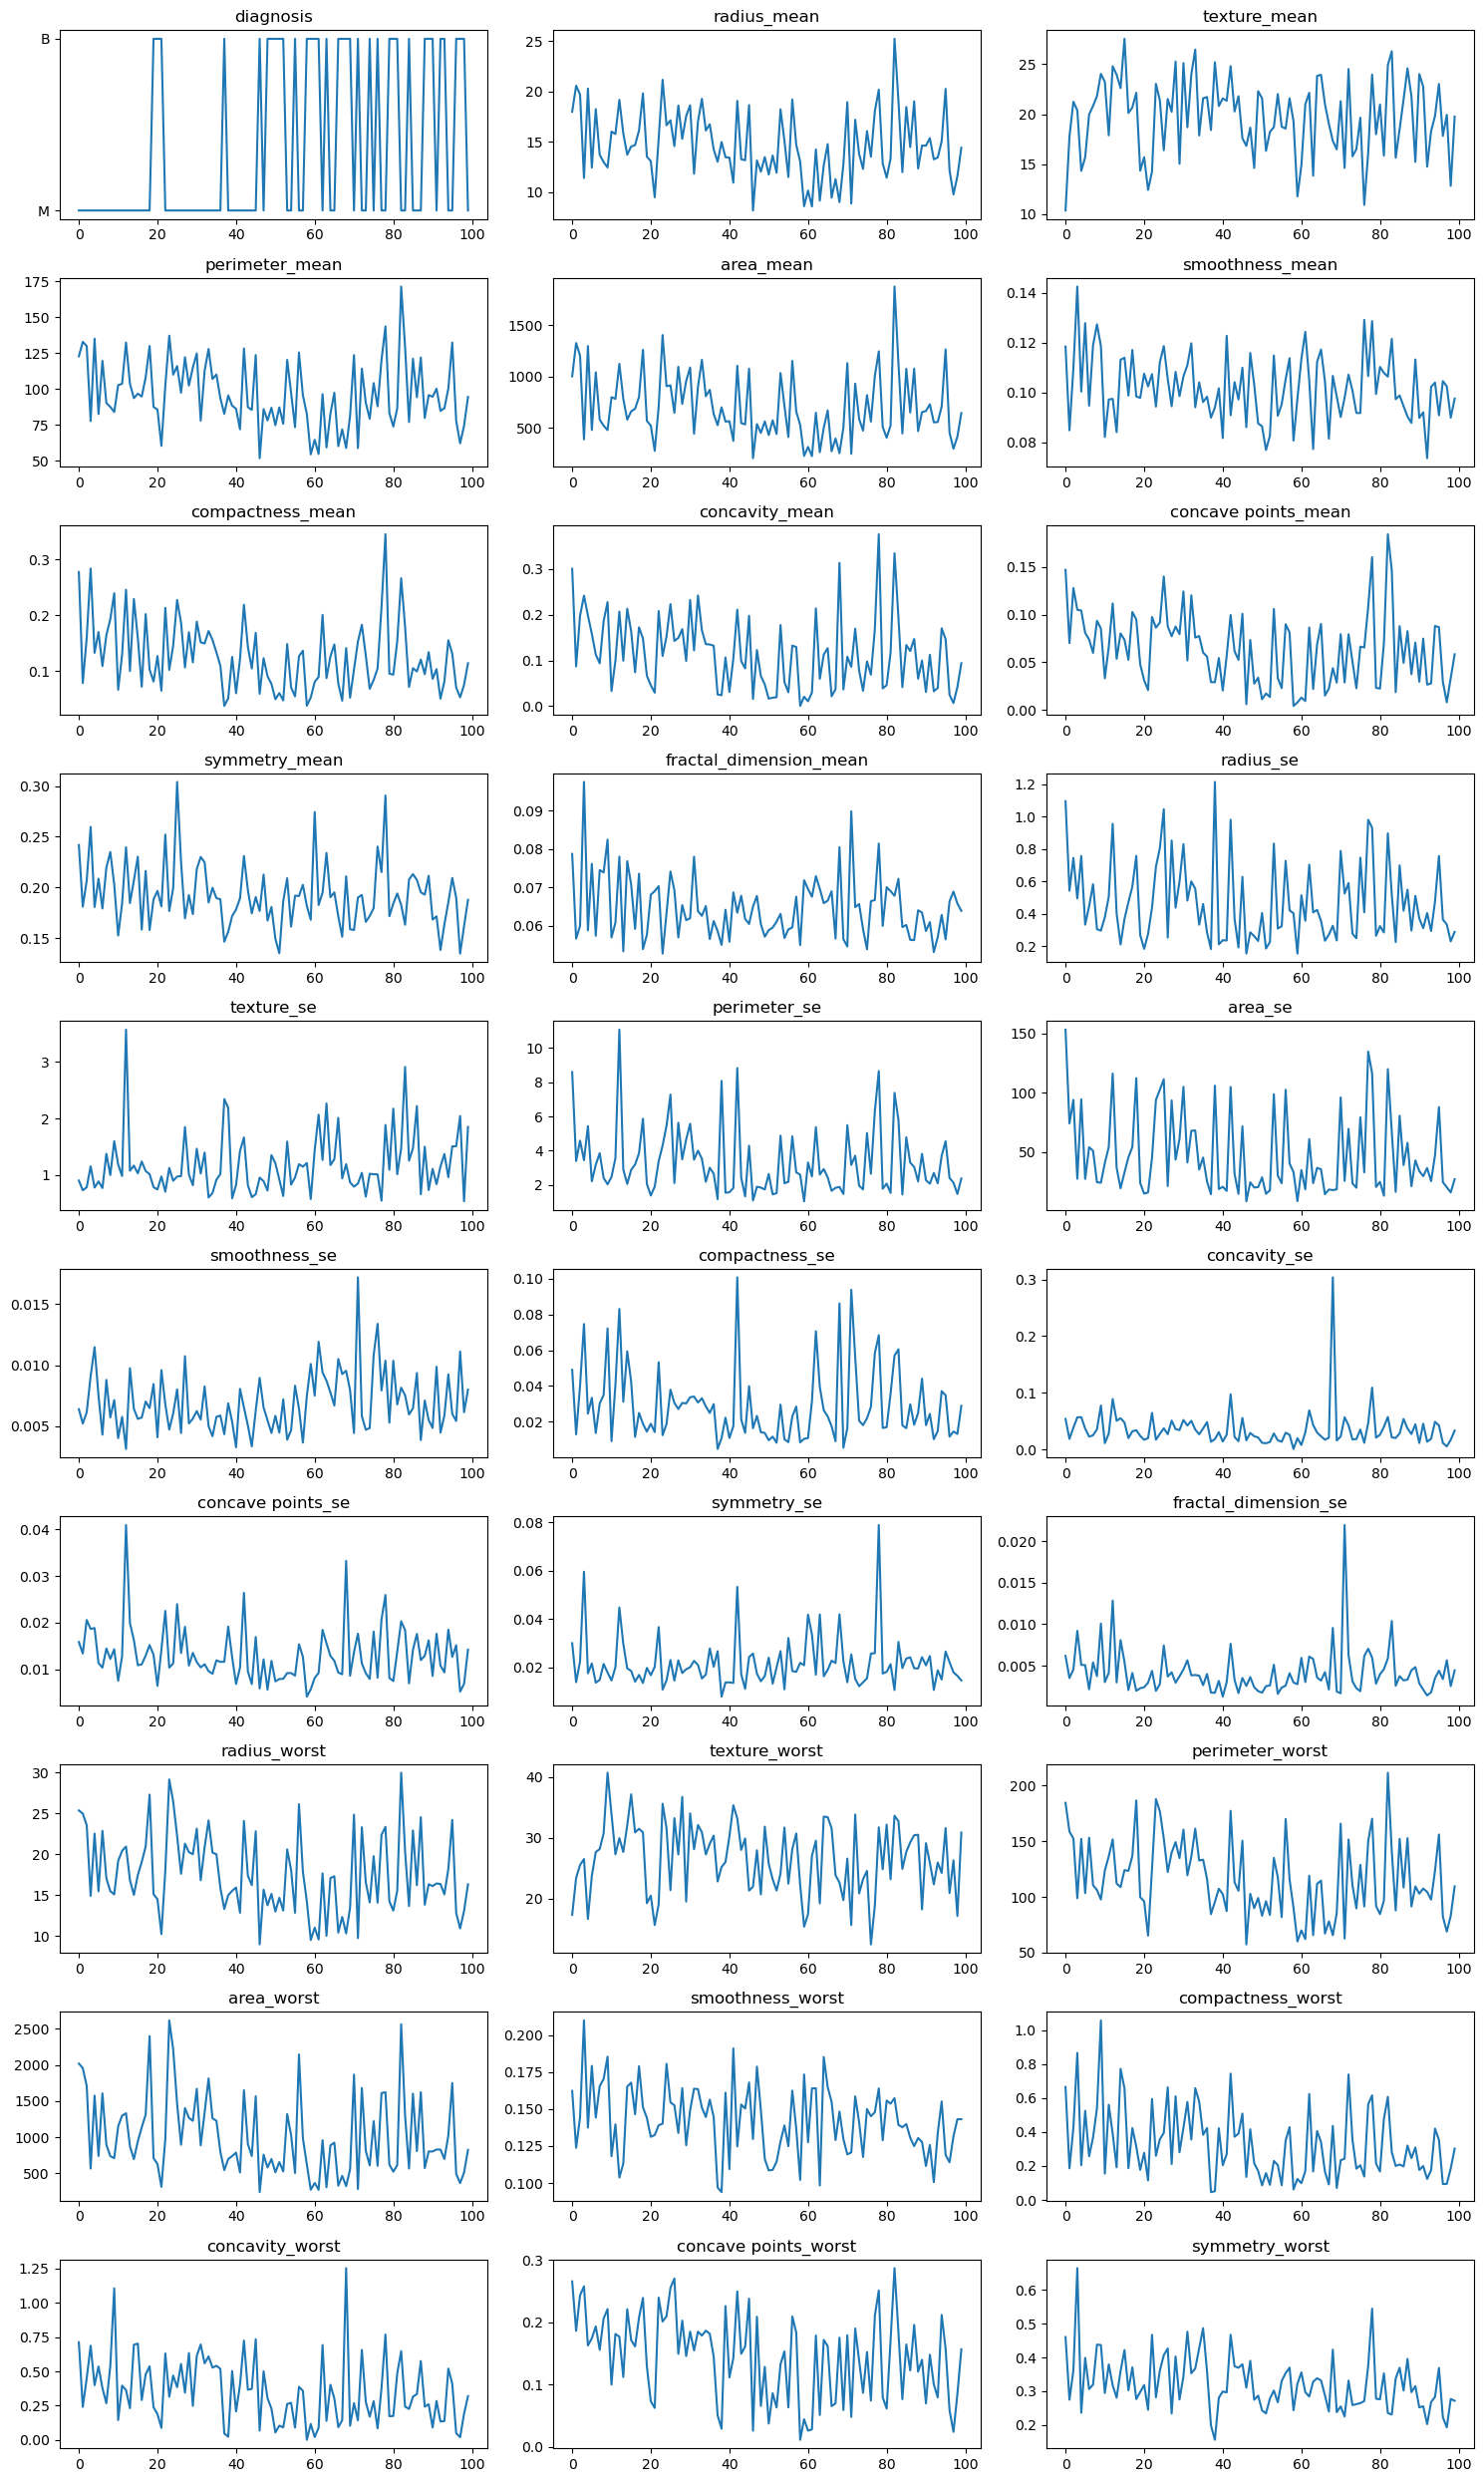

In [126]:
f,a = plt.subplots(10,3, figsize = (15, 25))
a = a.ravel()
cols = data.columns
for idx,ax in enumerate(a):
    ax.plot(data[:100][cols[idx]])
    ax.title.set_text(cols[idx])
plt.tight_layout()

array([[<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >],
       [<Axes: >, <Axes: >, <Axes: >]], dtype=object)

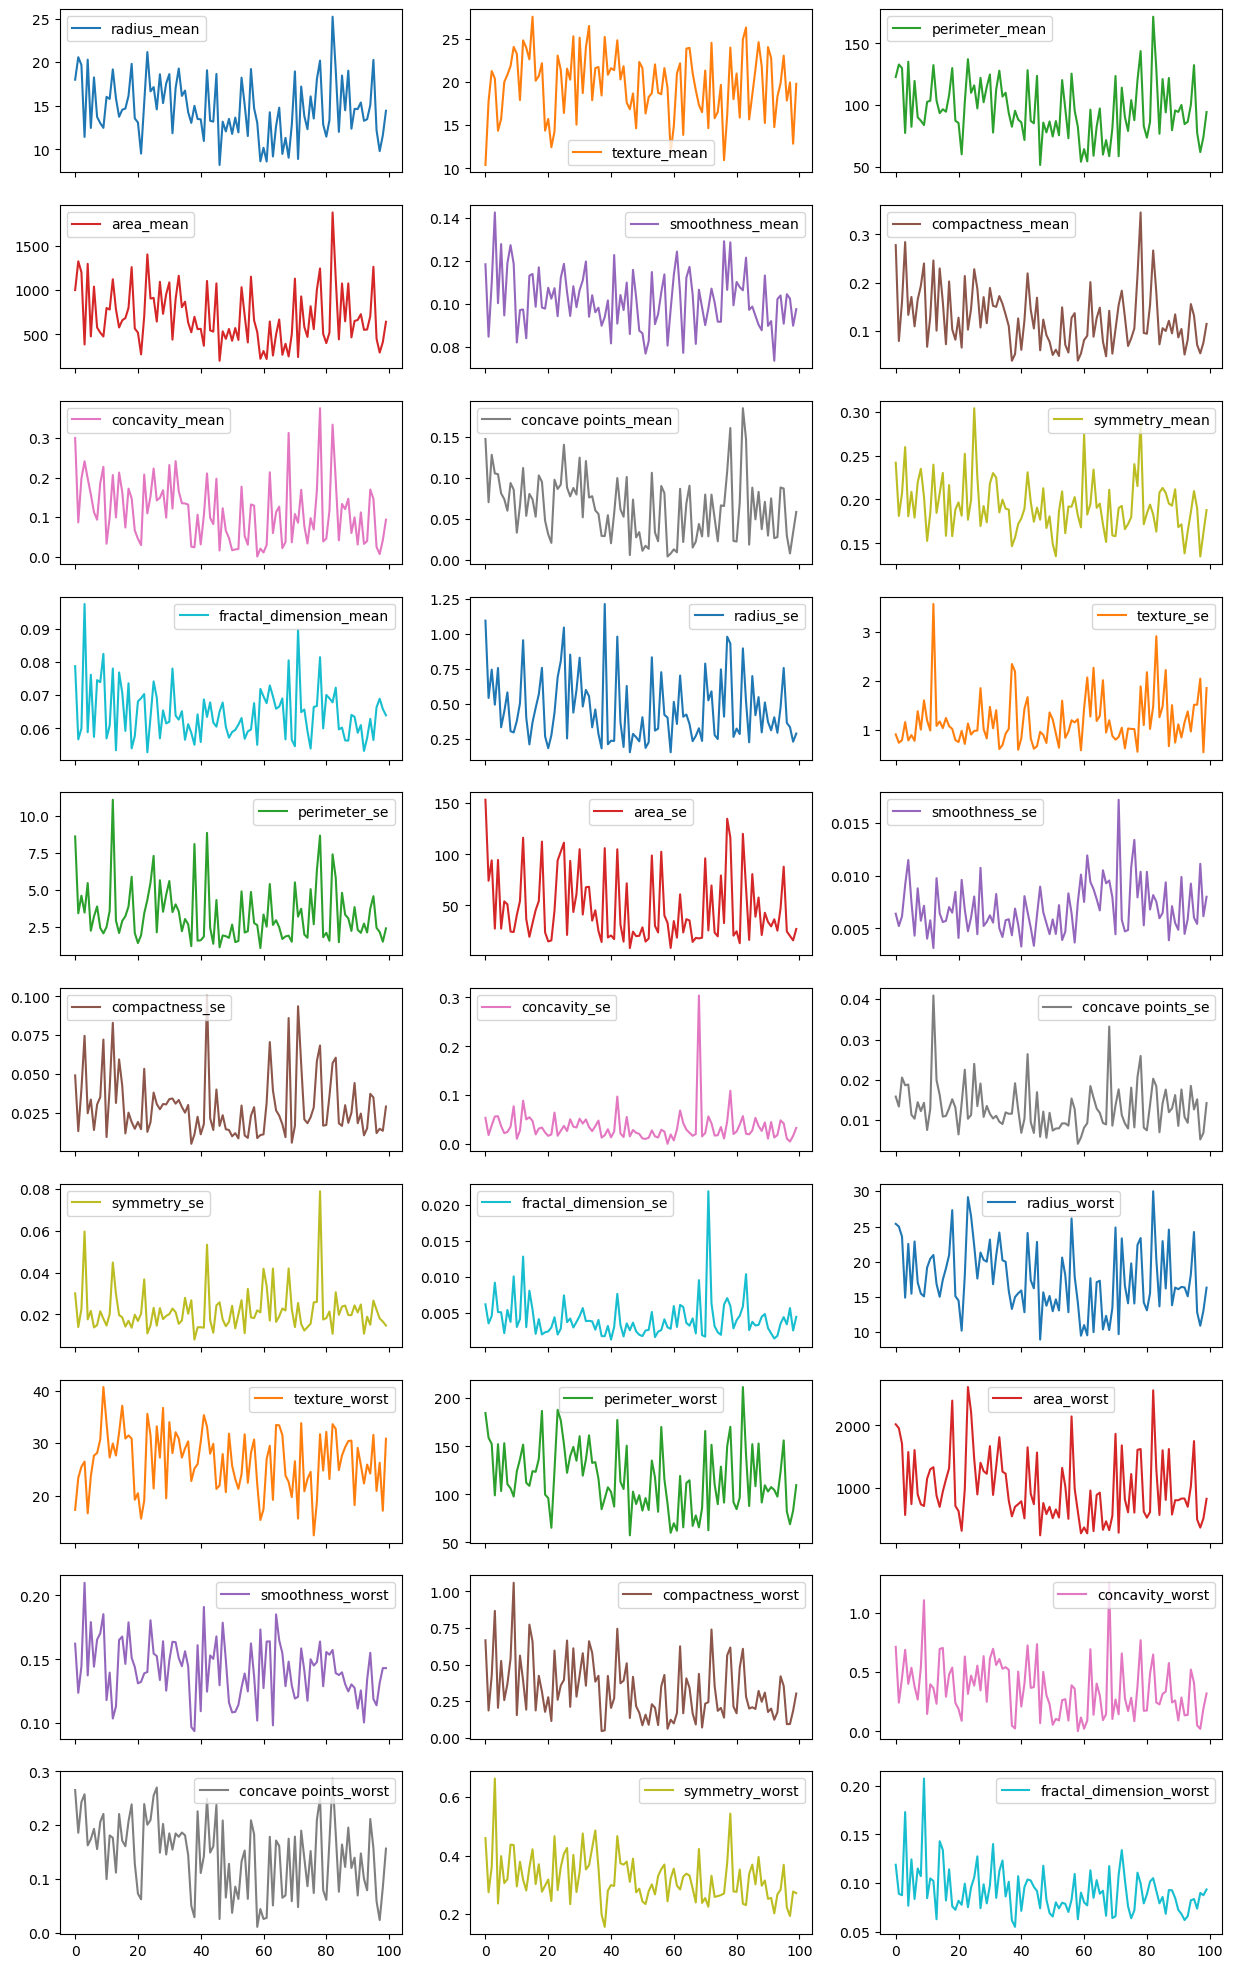

In [127]:
data[:100].plot(subplots =True, layout = (10, 3), figsize = (15, 25))

In [59]:
data['diagnosis'] = data['diagnosis'].map({'B' : 0, 'M' : 1})


<BarContainer object of 2 artists>

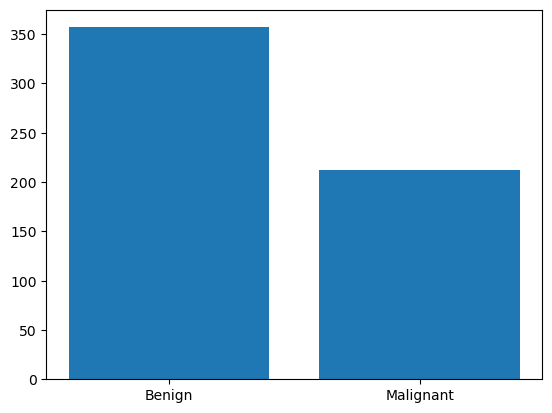

In [60]:
plt.bar(["Benign", "Malignant"], data["diagnosis"].value_counts())

<Axes: >

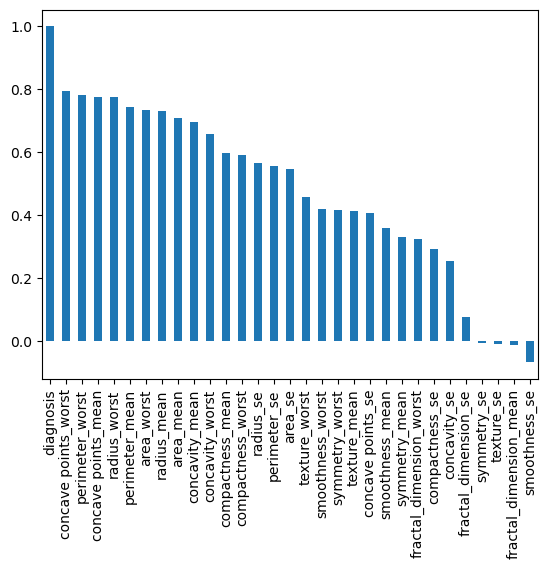

In [61]:
data.corr()['diagnosis'].sort_values(ascending=False).plot(kind='bar')


# Data Preparation

In [62]:
#features
X = data.drop("diagnosis", axis = 1).values
#labels
y = data["diagnosis"].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
# Our classes are imbalanced so we chose 20% from each class as test data
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,stratify=y)

In [65]:
#standardize data
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test= sc.transform(X_test)

# Logistic Regression 

In [66]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=0).fit(X_train, y_train)

In [67]:
predicted1 = lr.predict(X_test)

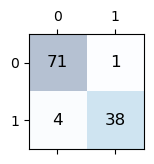

In [68]:
#Confusion Matrix 
cm_lr = confusion_matrix(y_test, predicted1)
(y_test, predicted1)
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.matshow(cm_lr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(x=j, y=i,s=cm_lr[i, j], va='center', ha='center', size='large')

In [69]:
#classification report 
print(classification_report(y_test,predicted1))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97        72
           1       0.97      0.90      0.94        42

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



In [70]:
accuracy1 = (cm_lr[0][0]+cm_lr[1][1])/(cm_lr[0][0]+cm_lr[0][1]+cm_lr[1][0]+cm_lr[1][1])
print("Accuracy: "+ str(accuracy1*100)+"%")

Accuracy: 95.6140350877193%


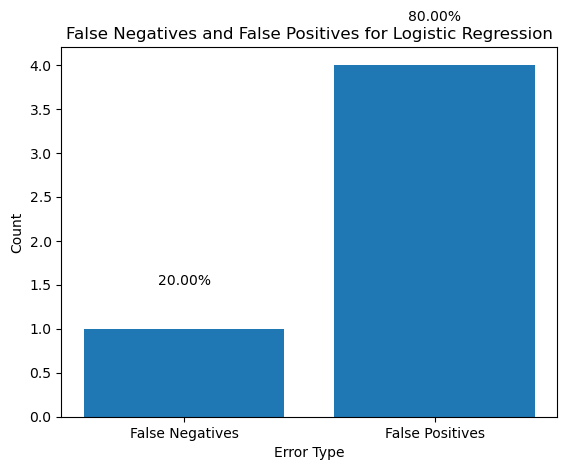

In [117]:
# Define the counts of FN and FP
fn_count = 1  # Replace with the actual count of false negatives
fp_count = 4 # Replace with the actual count of false positives

# Compute the total count
total_count = fn_count + fp_count

# Compute the percentages
fn_percentage = (fn_count / total_count) * 100
fp_percentage = (fp_count / total_count) * 100

# Create a list of labels for the histogram
labels = ['False Negatives', 'False Positives']

# Create a list of counts for the histogram
counts = [fn_count, fp_count]

# Create a list of percentages for the histogram
percentages = [fn_percentage, fp_percentage]

# Create the histogram
plt.bar(labels, counts)

# Add labels and title
plt.xlabel('Error Type')
plt.ylabel('Count')
plt.title('False Negatives and False Positives for Logistic Regression')

# Add the percentage values as text on top of the bars
for i, count in enumerate(counts):
    plt.text(i, count + 0.5, f'{percentages[i]:.2f}%', ha='center')

# Display the histogram
plt.show()

# XGBoost Classifier

In [72]:
!pip install xgboost
from xgboost.sklearn import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
parameters = {'learning_rate': [0.01, 0.03, 0.05, 0.1, 0.3, 0.5, 0.8],
              'max_depth': [1 , 2, 3, 4, 5, 6, 7, 8, 9],
              'min_child_weight': [1, 3, 5, 7, 9],
              'subsample': [0.1, 0.3, 0.5, 0.7, 0.9],
              'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
              'n_estimators': [500],
              'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
              'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9]
             }

model = XGBClassifier()
xgb_grid = RandomizedSearchCV(model,parameters, cv = 2, n_jobs = -1)
xgb_grid.fit(X_train, y_train)

RandomizedSearchCV(cv=2,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           callbacks=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None,
                                           early_stopping_rounds=None,
                                           enable_categorical=False,
                                           eval_metric=None, feature_types=None,
                                           gamma=None, gpu_id=None,
                                           grow_policy=None,
                                           importance_type=None,
                                           interaction_constraints=None,
                                           learning_rate...
                                           predictor=None, random_state=None, ...),
                   n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.1, 0.3, 0.5, 0.7,
                                                             0.9],
                                        'gamma': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'learning_rate': [0.01, 0.03, 0.05, 0.1,
                                                          0.3, 0.5, 0.8],
                                        'max_depth': [1, 2, 3, 4, 5, 6, 7, 8,
                                                      9],
                                        'min_child_weight': [1, 3, 5, 7, 9],
                                        'n_estimators': [500],
                                        'reg_alpha': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'reg_lambda': [0.1, 0.3, 0.5, 0.7, 0.9],
                                        'subsample': [0.1, 0.3, 0.5, 0.7, 0.9]})

In [73]:
predicted2 = xgb_grid.predict(X_test)

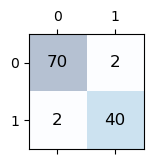

In [74]:
#confusion matrix
cm_xgb = confusion_matrix(y_test,predicted2)
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.matshow(cm_xgb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_xgb.shape[0]):
    for j in range(cm_xgb.shape[1]):
        ax.text(x=j, y=i,s=cm_xgb[i, j], va='center', ha='center', size='large')

In [75]:
print(classification_report(y_test,predicted2))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        72
           1       0.95      0.95      0.95        42

    accuracy                           0.96       114
   macro avg       0.96      0.96      0.96       114
weighted avg       0.96      0.96      0.96       114



In [76]:
accuracy2 = (cm_xgb[0][0]+cm_xgb[1][1])/(cm_xgb[0][0]+cm_xgb[0][1]+cm_xgb[1][0]+cm_xgb[1][1])
print("Accuracy: "+ str(accuracy2*100)+"%")

Accuracy: 96.49122807017544%


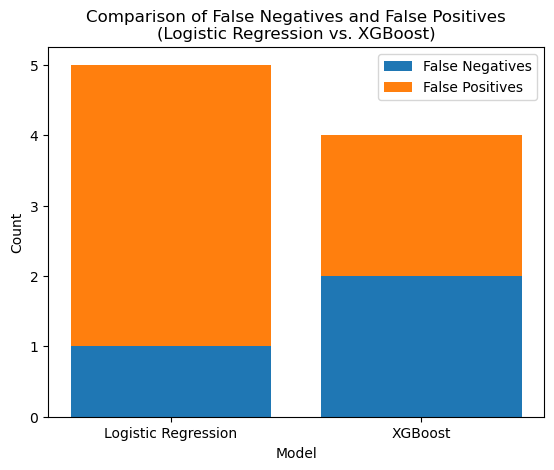

In [97]:
# Define the counts of FN and FP for logistic regression and XGBoost
lr_fn_count =  1 # Replace with the actual count of false negatives for logistic regression
lr_fp_count =  4 # Replace with the actual count of false positives for logistic regression



xgb_fn_count = 2  # Replace with the actual count of false negatives for XGBoost
xgb_fp_count = 2  # Replace with the actual count of false positives for XGBoost

# Create a list of labels for the histogram
labels = ['Logistic Regression', 'XGBoost']

# Create a list of FN counts for logistic regression and XGBoost
fn_counts = [lr_fn_count, xgb_fn_count]

# Create a list of FP counts for logistic regression and XGBoost
fp_counts = [lr_fp_count, xgb_fp_count]

# Create the histogram
plt.bar(labels, fn_counts, label='False Negatives')
plt.bar(labels, fp_counts, label='False Positives', bottom=fn_counts)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Comparison of False Negatives and False Positives\n(Logistic Regression vs. XGBoost)')

# Add legend
plt.legend()

# Display the histogram
plt.show()

# Kneighbors

In [99]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

knn = KNeighborsClassifier()

k_list = list(range(1, 10))
k_values = dict(n_neighbors=k_list)
grid = GridSearchCV(knn, k_values, cv=5, scoring='accuracy', n_jobs=-1)
grid.fit(X_train, y_train)

print("Best Parameter:", grid.best_params_)
print("Best Score:", grid.best_score_)

Best Parameter: {'n_neighbors': 5}
Best Score: 0.964835164835165


In [100]:
predicted3 = grid.predict(X_test)

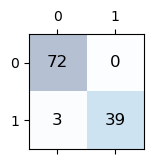

In [101]:
#confusion matrix
cm_knn = confusion_matrix(y_test,predicted3)
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.matshow(cm_knn, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_knn.shape[0]):
    for j in range(cm_knn.shape[1]):
        ax.text(x=j, y=i,s=cm_knn[i, j], va='center', ha='center', size='large')

In [102]:
print(classification_report(y_test,predicted3))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98        72
           1       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [103]:
accuracy3 = (cm_knn[0][0]+cm_knn[1][1])/(cm_knn[0][0]+cm_knn[0][1]+cm_knn[1][0]+cm_knn[1][1])
print("Accuracy: "+ str(accuracy3*100)+"%")

Accuracy: 97.36842105263158%


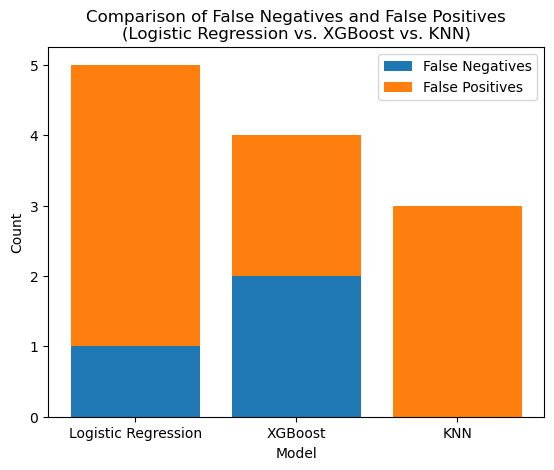

In [105]:
# Define the counts of FN and FP for logistic regression, XGBoost, and KNN
lr_fn_count = 1  # Replace with the actual count of false negatives for logistic regression
lr_fp_count = 4  # Replace with the actual count of false positives for logistic regression

xgb_fn_count = 2  # Replace with the actual count of false negatives for XGBoost
xgb_fp_count = 2  # Replace with the actual count of false positives for XGBoost

knn_fn_count = 0 # Replace with the actual count of false negatives for KNN
knn_fp_count = 3  # Replace with the actual count of false positives for KNN

# Create a list of labels for the histogram
labels = ['Logistic Regression', 'XGBoost', 'KNN']

# Create a list of FN counts for logistic regression, XGBoost, and KNN
fn_counts = [lr_fn_count, xgb_fn_count, knn_fn_count]

# Create a list of FP counts for logistic regression, XGBoost, and KNN
fp_counts = [lr_fp_count, xgb_fp_count, knn_fp_count]

# Create the histogram
plt.bar(labels, fn_counts, label='False Negatives')
plt.bar(labels, fp_counts, label='False Positives', bottom=fn_counts)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Comparison of False Negatives and False Positives\n(Logistic Regression vs. XGBoost vs. KNN)')

# Add legend
plt.legend()

# Display the histogram
plt.show()

# Decision tree

In [106]:

from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
dt = DecisionTreeClassifier()

# Train Decision Tree Classifer
dt = dt.fit(X_train,y_train)



In [107]:
predicted4= dt.predict(X_test)

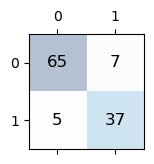

In [108]:
# confusion matrix
cm_dt = confusion_matrix(y_test, predicted4)
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,s=cm_dt[i, j], va='center', ha='center', size='large')

In [109]:
print(classification_report(y_test,predicted4))

              precision    recall  f1-score   support

           0       0.93      0.90      0.92        72
           1       0.84      0.88      0.86        42

    accuracy                           0.89       114
   macro avg       0.88      0.89      0.89       114
weighted avg       0.90      0.89      0.90       114



In [110]:
accuracy4 = (cm_dt[0][0]+cm_dt[1][1])/(cm_dt[0][0]+cm_dt[0][1]+cm_dt[1][0]+cm_dt[1][1])
print("Accuracy: "+ str(accuracy4*100)+"%")

Accuracy: 89.47368421052632%


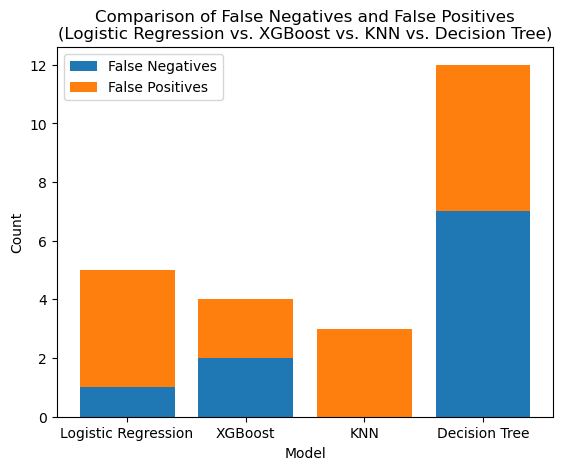

In [111]:
import matplotlib.pyplot as plt

# Define the counts of FN and FP for each model
lr_fn_count = 1  # Replace with the actual count of false negatives for Logistic Regression
lr_fp_count = 4 # Replace with the actual count of false positives for Logistic Regression

xgb_fn_count = 2 # Replace with the actual count of false negatives for XGBoost
xgb_fp_count = 2  # Replace with the actual count of false positives for XGBoost

knn_fn_count = 0 # Replace with the actual count of false negatives for KNN
knn_fp_count = 3  # Replace with the actual count of false positives for KNN

dt_fn_count = 7# Replace with the actual count of false negatives for Decision Tree
dt_fp_count = 5  # Replace with the actual count of false positives for Decision Tree

# Create a list of labels for the histogram
labels = ['Logistic Regression', 'XGBoost', 'KNN', 'Decision Tree']

# Create a list of FN counts for each model
fn_counts = [lr_fn_count, xgb_fn_count, knn_fn_count, dt_fn_count]

# Create a list of FP counts for each model
fp_counts = [lr_fp_count, xgb_fp_count, knn_fp_count, dt_fp_count]

# Create the histogram
plt.bar(labels, fn_counts, label='False Negatives')
plt.bar(labels, fp_counts, label='False Positives', bottom=fn_counts)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Comparison of False Negatives and False Positives\n(Logistic Regression vs. XGBoost vs. KNN vs. Decision Tree)')

# Add legend
plt.legend()

# Display the histogram
plt.show()


# Naive Bayes

In [112]:
from sklearn.naive_bayes import GaussianNB

# Build a Gaussian Classifier
nb = GaussianNB()

# Model training
nb.fit(X_train, y_train)



GaussianNB()

In [113]:
predicted5 = nb.predict(X_test)

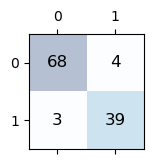

In [114]:
#confusion matrix 
cm_nb = confusion_matrix(y_test, predicted5)
fig, ax = plt.subplots(figsize=(1.5, 1.5))
ax.matshow(cm_nb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_nb.shape[0]):
    for j in range(cm_nb.shape[1]):
        ax.text(x=j, y=i,s=cm_nb[i, j], va='center', ha='center', size='large')

In [115]:
print(classification_report(y_test,predicted5))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        72
           1       0.91      0.93      0.92        42

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.93       114
weighted avg       0.94      0.94      0.94       114



In [95]:
accuracy5 = (cm_nb[0][0]+cm_nb[1][1])/(cm_nb[0][0]+cm_nb[0][1]+cm_nb[1][0]+cm_nb[1][1])
print("Accuracy: "+ str(accuracy5*100)+"%")

Accuracy: 93.85964912280701%


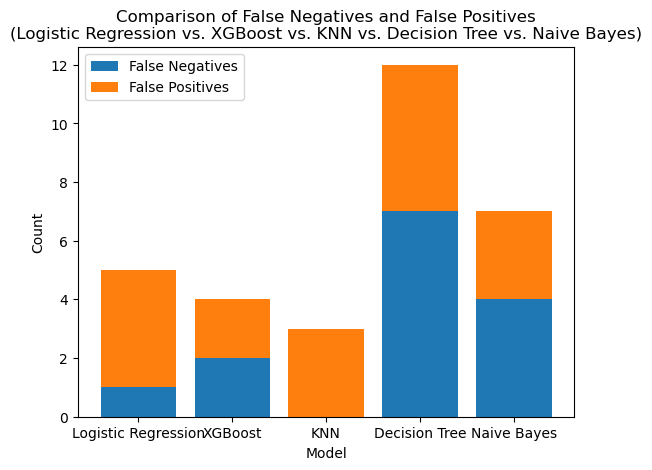

In [116]:

# Define the counts of FN and FP for each model
lr_fn_count = 1  # Replace with the actual count of false negatives for Logistic Regression
lr_fp_count = 4  # Replace with the actual count of false positives for Logistic Regression

xgb_fn_count = 2 # Replace with the actual count of false negatives for XGBoost
xgb_fp_count = 2  # Replace with the actual count of false positives for XGBoost

knn_fn_count = 0  # Replace with the actual count of false negatives for KNN
knn_fp_count = 3  # Replace with the actual count of false positives for KNN

dt_fn_count = 7# Replace with the actual count of false negatives for Decision Tree
dt_fp_count = 5  # Replace with the actual count of false positives for Decision Tree

nb_fn_count = 4  # Replace with the actual count of false negatives for Naive Bayes
nb_fp_count = 3  # Replace with the actual count of false positives for Naive Bayes

# Create a list of labels for the histogram
labels = ['Logistic Regression', 'XGBoost', 'KNN', 'Decision Tree', 'Naive Bayes']

# Create a list of FN counts for each model
fn_counts = [lr_fn_count, xgb_fn_count, knn_fn_count, dt_fn_count, nb_fn_count]

# Create a list of FP counts for each model
fp_counts = [lr_fp_count, xgb_fp_count, knn_fp_count, dt_fp_count, nb_fp_count]

# Create the histogram
plt.bar(labels, fn_counts, label='False Negatives')
plt.bar(labels, fp_counts, label='False Positives', bottom=fn_counts)

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Count')
plt.title('Comparison of False Negatives and False Positives\n(Logistic Regression vs. XGBoost vs. KNN vs. Decision Tree vs. Naive Bayes)')

# Add legend
plt.legend()

# Display the histogram
plt.show()

# TOP 10 important features for the classification

In [48]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

features = X
target = y

best_features = SelectKBest(score_func = chi2,k = 10)
fit = best_features.fit(features,target)

featureScores = pd.DataFrame(data = fit.scores_,index = list(data.columns[1:]),columns = ['Chi Squared Score']) 

featureScores.sort_values(by = 'Chi Squared Score', ascending = False).round(2)[:10]

,Chi Squared Score
area_worst,112598.43
area_mean,53991.66
area_se,8758.50
perimeter_worst,3665.04
perimeter_mean,2011.10
radius_worst,491.69
radius_mean,266.10
perimeter_se,250.57
texture_worst,174.45
texture_mean,93.90
